# **Naive Bayes Classifier**

```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```GaussianNB``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
iris = load_iris()  # Cargar el dataset de iris
iris_x = iris.data[:, :2]  # Seleccionamos las dos primeras características (longitud y ancho del sépalo)
iris_y = iris.target  # Etiquetas (especies de flores)

# Imprimir formas
print(f"Características: {iris_x.shape}, Etiquetas: {iris_y.shape}")


Características: (150, 2), Etiquetas: (150,)


In [ ]:
# Instancia del objeto kNN
naive_bayes = GaussianNB()

# Entrenamiento
naive_bayes.fit(iris_x, iris_y)


GaussianNB()

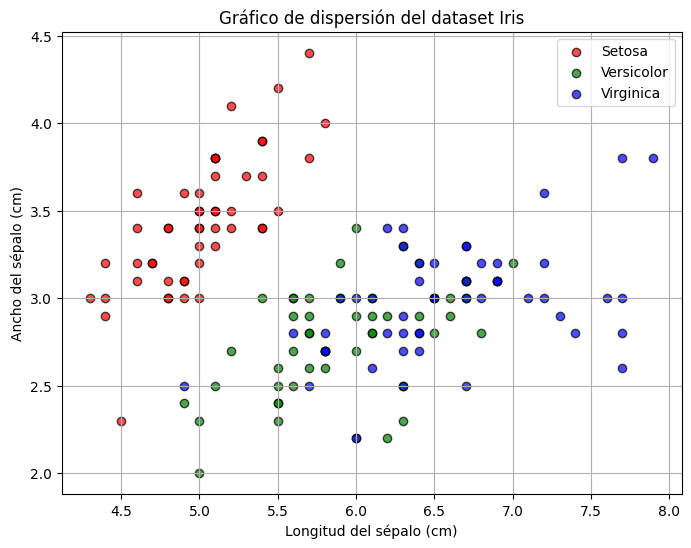

In [ ]:
import matplotlib.pyplot as plt

# Definir colores y etiquetas
colors = ['red', 'green', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']

# Crear el scatter plot
plt.figure(figsize=(8, 6))
for i, color, species_name in zip(range(3), colors, species):
    plt.scatter(iris_x[iris_y == i, 0], iris_x[iris_y == i, 1],
                color=color, label=species_name, edgecolor='k', alpha=0.7)

plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Gráfico de dispersión del dataset Iris')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


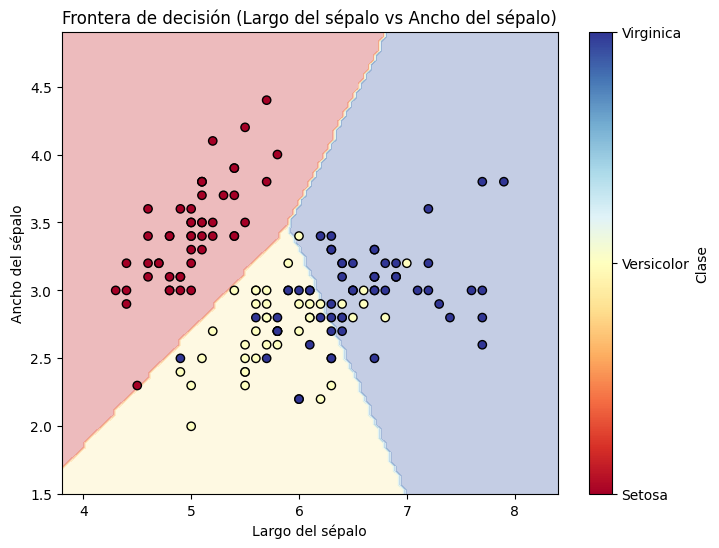

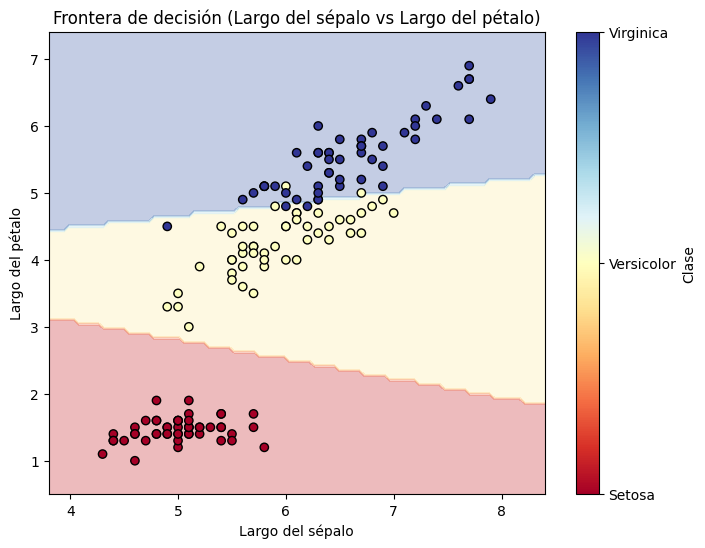

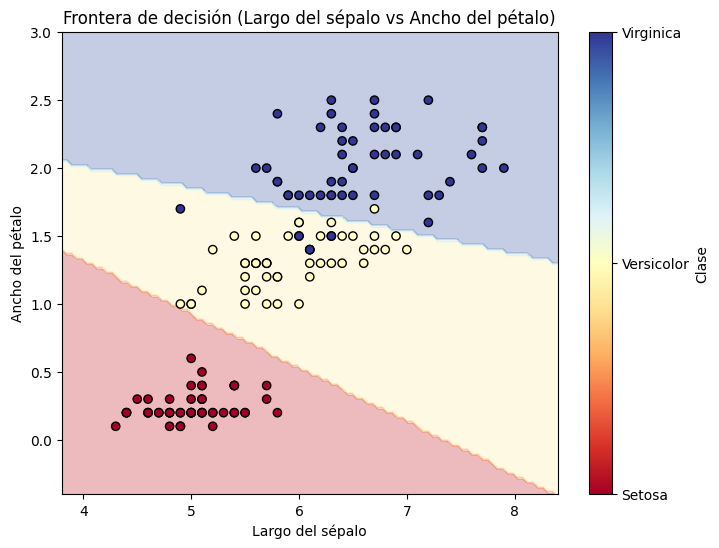

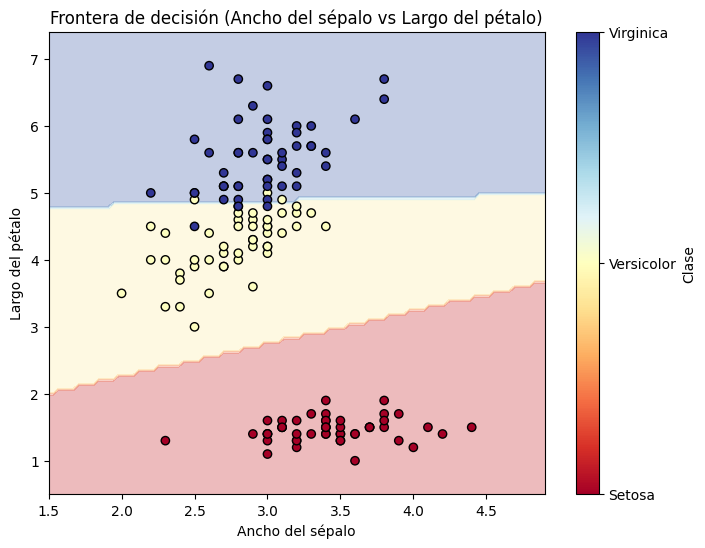

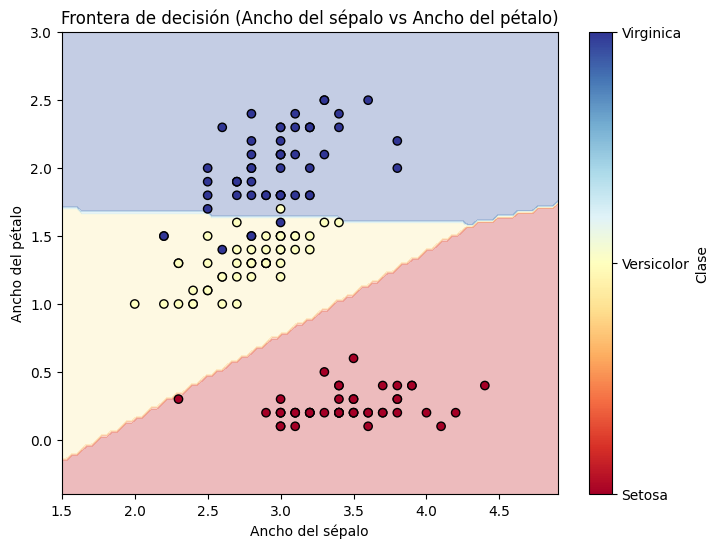

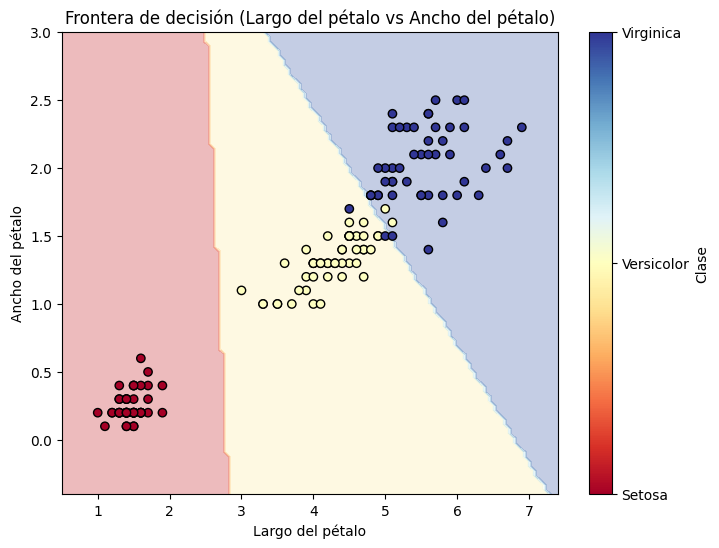

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import itertools

# Cargar la base de datos iris
iris = load_iris()
iris_x = iris.data
iris_y = iris.target

# Nombres de las características
feature_names = [
    'Largo del sépalo',
    'Ancho del sépalo',
    'Largo del pétalo',
    'Ancho del pétalo'
]

# Número de características
num_features = iris_x.shape[1]

# Crear gráficos de pares de características
for i, j in itertools.combinations(range(num_features), 2):
    # Seleccionar dos características para el gráfico
    x = iris_x[:, [i, j]]

    # Instanciar y entrenar el modelo
    logistic_regression = LogisticRegression(max_iter=500)
    logistic_regression.fit(x, iris_y)

    # Valores mínimos y máximos para crear el grid de las fronteras de decisión
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

    # Crear el grid de las fronteras de decisión
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir los valores del grid
    predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
    predictions = predictions.reshape(x_grid.shape)

    # Visualizar la frontera de decisión
    plt.figure(figsize=(8, 6))
    plt.contourf(x_grid, y_grid, predictions, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(x[:, 0], x[:, 1], c=iris_y, edgecolor='k', cmap=plt.cm.RdYlBu)

    # Etiquetas de los ejes
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(f'Frontera de decisión ({feature_names[i]} vs {feature_names[j]})')

    # Agregar la barra de colores
    cbar = plt.colorbar(label='Clase')
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])

    plt.show()


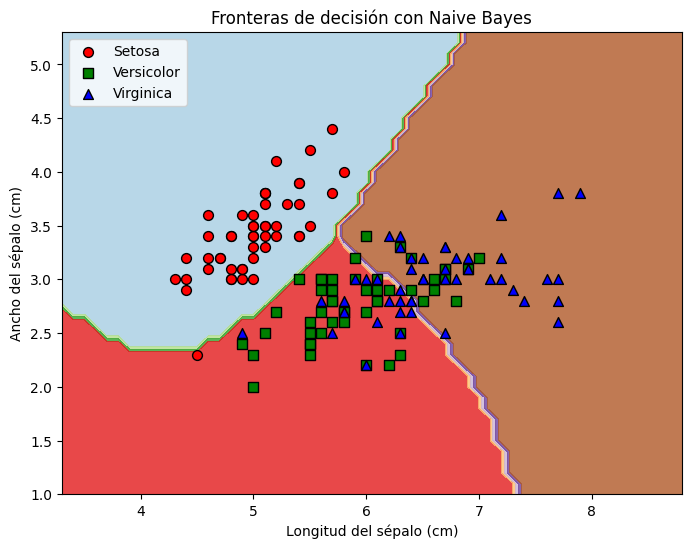

In [ ]:
# Crear una malla para graficar las fronteras de decisión
x_min, x_max = iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1
y_min, y_max = iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Usar el modelo entrenado para predecir las clases en la malla
Z = naive_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el contorno y los puntos de datos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Graficar los puntos de datos con diferentes colores y marcadores para cada clase
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
species = ['Setosa', 'Versicolor', 'Virginica']

for i, color, marker, species_name in zip(range(3), colors, markers, species):
    plt.scatter(iris_x[iris_y == i, 0], iris_x[iris_y == i, 1],
                color=color, label=species_name, edgecolor='k', marker=marker, s=50)

# Etiquetas de los ejes y título
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Fronteras de decisión con Naive Bayes')

# Añadir leyenda
plt.legend(loc='upper left')

plt.show()


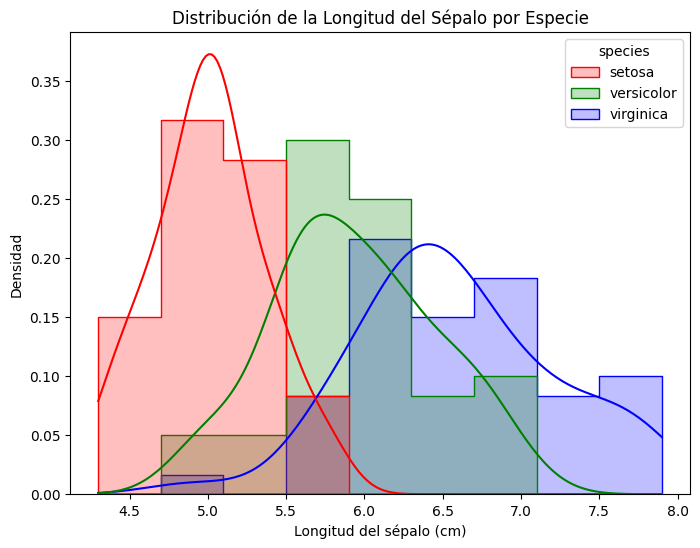

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', kde=True, palette=colors, element='step', stat='density')
plt.title('Distribución de la Longitud del Sépalo por Especie')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Densidad')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Cargar el archivo CSV en un DataFrame
fruit_data = pd.read_csv('/content/fruits_data_ext.csv')

# Seleccionar las características
fruits_x = fruit_data[['mass', 'width', 'height', 'color_score']].values

# Seleccionar las etiquetas
fruits_y = fruit_data['fruit_label'].values

# Convertir todo a np arrays (esto ya lo es con el uso de .values)
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Imprimir formas
print(f"Características: {fruits_x.shape}, Etiquetas: {fruits_y.shape}")

Características: (177, 4), Etiquetas: (177,)


In [ ]:
# Instancia del objeto kNN
naive_bayes = GaussianNB()

# Entrenamiento
naive_bayes.fit(fruits_x, fruits_y)

GaussianNB()

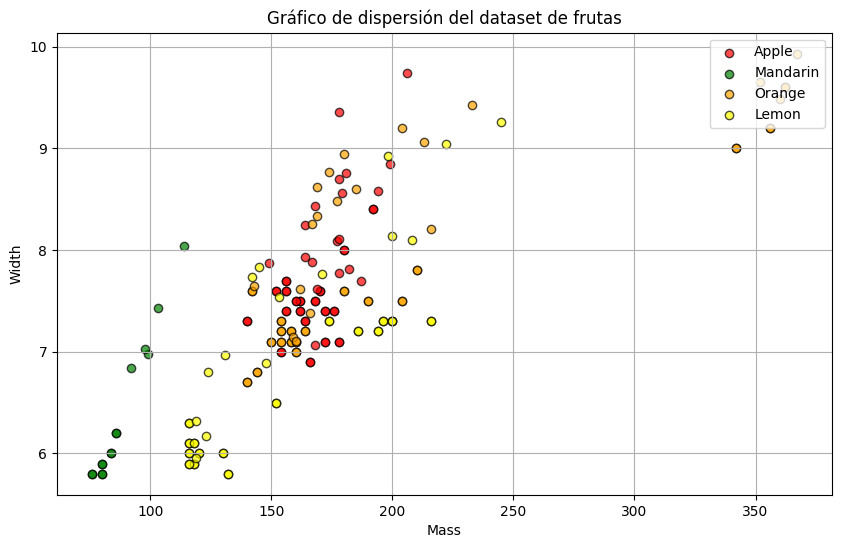

In [ ]:
import matplotlib.pyplot as plt

# Definir colores y etiquetas
colors = ['red', 'green', 'orange', 'yellow']
labels = {1: 'Apple', 2: 'Mandarin', 3: 'Orange', 4: 'Lemon'}

# Crear el scatter plot para dos características
plt.figure(figsize=(10, 6))
for label, color in labels.items():
    plt.scatter(fruits_x[fruits_y == label, 0], fruits_x[fruits_y == label, 1],
                color=colors[label-1], label=labels[label], edgecolor='k', alpha=0.7)

plt.xlabel('Mass')
plt.ylabel('Width')
plt.title('Gráfico de dispersión del dataset de frutas')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



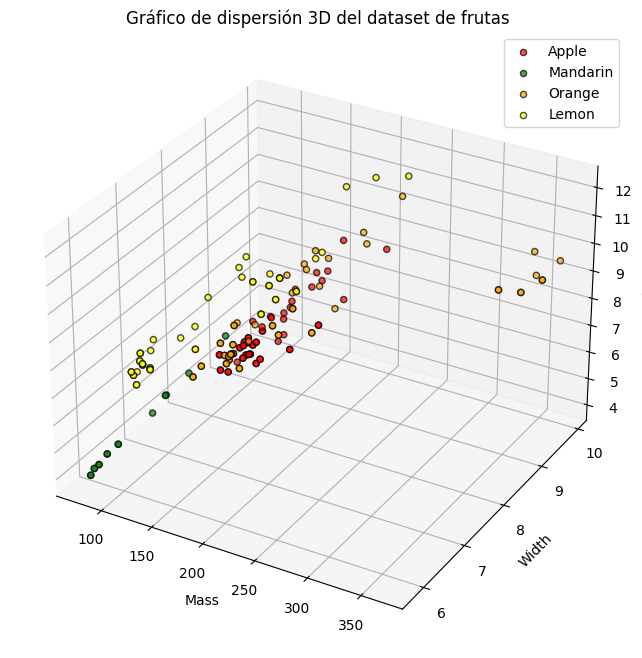

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in labels.items():
    ax.scatter(fruits_x[fruits_y == label, 0],
               fruits_x[fruits_y == label, 1],
               fruits_x[fruits_y == label, 2],
               color=colors[label-1],
               label=labels[label],
               edgecolor='k',
               alpha=0.7)

ax.set_xlabel('Mass')
ax.set_ylabel('Width')
ax.set_zlabel('Height')
ax.set_title('Gráfico de dispersión 3D del dataset de frutas')
ax.legend(loc='upper right')
plt.show()


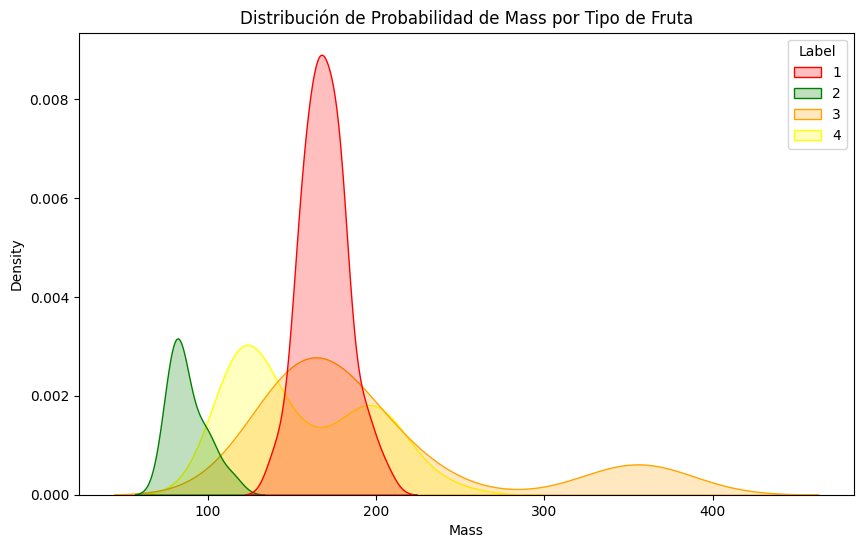

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con las características y etiquetas
fruit_data = pd.DataFrame(fruits_x, columns=['Mass', 'Width', 'Height', 'Color_Score'])
fruit_data['Label'] = fruits_y

# Crear un gráfico de densidad para la característica 'Mass'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fruit_data, x='Mass', hue='Label', palette=colors, fill=True)
plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('Distribución de Probabilidad de Masa (mass) por Tipo de Fruta')
plt.show()
